In [30]:
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, linspace, exp, real, imag, abs, conj
from numpy.fft import fft, fftshift

import numpy as np

In [71]:
%matplotlib inline

In [3]:
b=.08*1e-3

a=.25*1e-3

k=2*pi/(795*1e-9)

wt=0

C=1

L=1.9

d=.03

In [4]:
def alpha(y):
    return k*a*y/(2*L)

In [5]:
def beta(y):
    return k*b*y/(2*L)

In [6]:
def E(y):
    return b*C*(sin(beta(y)) / beta(y)) * (sin(wt-k*L) + sin(wt-k*L+2*alpha(y)))

### Import gaussian beam function:

In [7]:
import BeamOptics as bopt

In [8]:
d=.027

y = linspace(-.006,.006,600)

In [9]:
pi * 0.0014**2 / 795e-9

7.745310189982383

In [10]:
E_lo_gauss = bopt.gaussian_beam(0,y,L,E0=0.005,zR=7.74,w0=0.003,k=[0,k*d/L,k])

# CAREFUL: can't zet zR and w0 independently, that changes the wavelength. TODO: fix this in bopt.

#TODO: check these beam parameters for sanity

#TODO: k value make sense?

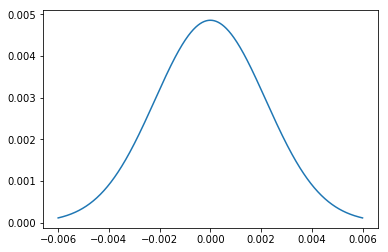

In [11]:
plt.plot(y,abs(E_lo_gauss))

In [12]:
TotalIntensity=(E(y)+E_lo_gauss) * (E(y)+E_lo_gauss).conj()

/Users/dawe7269/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


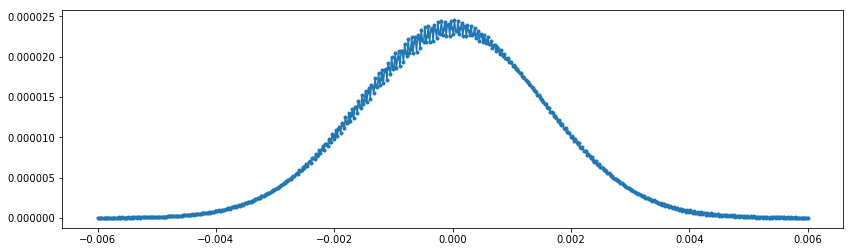

In [13]:
plt.figure(figsize=(14,4))
plt.plot(y,TotalIntensity,".-")

#plt.xlim([-.002,0])

(200, 250)

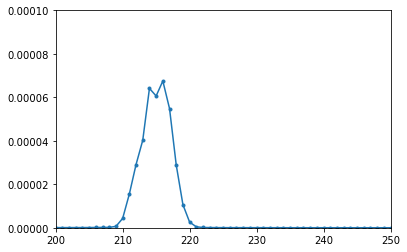

In [14]:
plt.plot(abs(fft(TotalIntensity)),".-")

plt.ylim([0,.0001]) # Had to lower the LO power quite a bit, and then zoom way in.

plt.xlim([200,250])

## Summary:
With the right scaling (-0.006 to 0.006) the peaks agree fairly well. Next compare to different slit sizes.

## Next:
Extend this exploration over another dimension vs. gaussian beam parameters:

In [160]:
N=15
data = np.zeros((600,N))
wmin = 0.001
wmax = 0.005

wlist = linspace(wmin,wmax,N)
for i,w in enumerate(wlist):
    E_lo_gauss = bopt.gaussian_beam(0,y,L,E0=0.005,zR=7.74,w0=w,k=[0,k*d/L,k])
    TotalIntensity=(E(y)+E_lo_gauss) * (E(y)+E_lo_gauss).conj()
    data[:,i] = abs(fft(TotalIntensity))
    #plt.plot(abs(fft(TotalIntensity)),".-")
    
#plt.xlim([150,275])
#plt.ylim([0,0.00003])

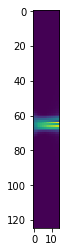

In [161]:
plt.imshow(data[150:275,:])

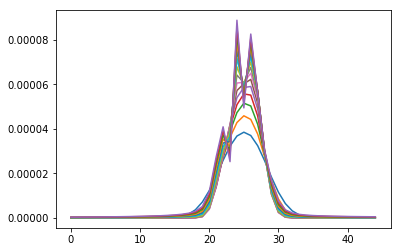

In [162]:
plt.plot(data[190:235,:])

In [163]:
Z = data[190:235,:]
xs = wlist
ys = np.linspace(150, 275, Z.shape[0])

X, Y = np.meshgrid(xs, ys)


In [164]:
from mpl_toolkits.mplot3d import axes3d

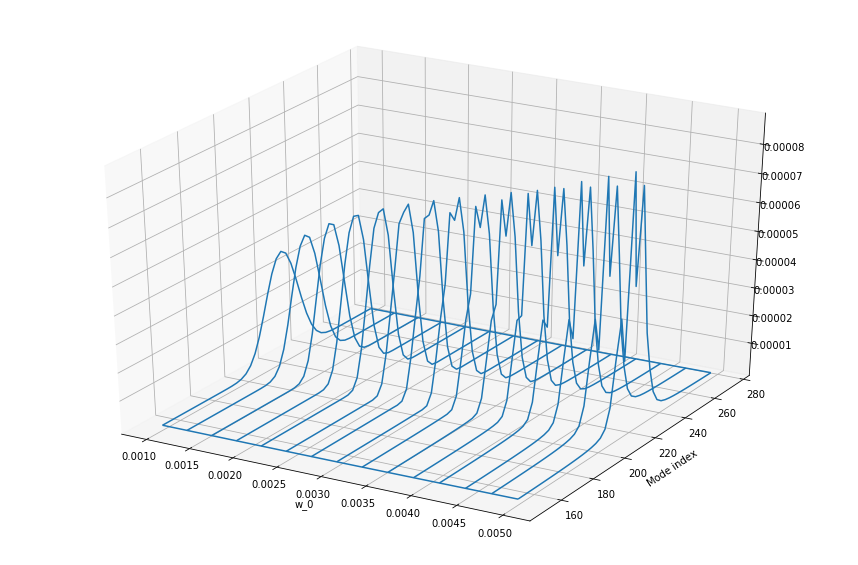

In [165]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
wframe = ax.plot_wireframe(X, Y, data[190:235,:],rstride=100)
plt.ylabel("Mode index")
plt.xlabel("w_0")

The spot size effectively determines the resolution. Gaussian blurring takes over for small spot sizes.